In [1]:
import pandas as pd

In [3]:
from occluded_face.loader import FileLoader

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

loader = FileLoader(image_dir='new_train_3')

[{'name': '0_0_00_afw2298img.jpg',
  'is_occluded': False,
  'is_top_occluded': False,
  'is_bottom_occluded': False},
 {'name': '0_0_00_afw1348img.jpg',
  'is_occluded': False,
  'is_top_occluded': False,
  'is_bottom_occluded': False},
 {'name': '1_0_11_MAFA_train_25263.jpg',
  'is_occluded': True,
  'is_top_occluded': False,
  'is_bottom_occluded': True},
 {'name': '1_0_11_MAFA_train_21817.jpg',
  'is_occluded': True,
  'is_top_occluded': False,
  'is_bottom_occluded': True},
 {'name': '0_0_00_PGU_126_01.jpg',
  'is_occluded': False,
  'is_top_occluded': False,
  'is_bottom_occluded': False},
 {'name': '0_0_00_afw294img.jpg',
  'is_occluded': False,
  'is_top_occluded': False,
  'is_bottom_occluded': False},
 {'name': '1_1_0afw39img.jpg',
  'is_occluded': True,
  'is_top_occluded': True,
  'is_bottom_occluded': False},
 {'name': '1_1_0_crop_182anngurakao1.jpg',
  'is_occluded': True,
  'is_top_occluded': True,
  'is_bottom_occluded': False},
 {'name': '0_0_00_afw729img.jpg',
  'is_o

In [5]:
import pandas as pd

df = pd.DataFrame(loader.aggregate())
df.to_csv('eda.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app

In [3]:
df = pd.read_csv("eda.csv",).drop("Unnamed: 0", axis=1)
occlusion_type = ['not_occluded', 'bottom_mislabled', 'top_mislabled', 'bottom_occluded', 'top_occluded', 'fully_occluded']

In [4]:
num_occlusion = df.groupby(df.columns.to_list()[1:4])['name']\
                .count().to_frame()['name'].values

In [5]:
occlusion_summary = pd.DataFrame(num_occlusion, index=occlusion_type, columns=['counts'])
occlusion_summary.values

array([[6480],
       [   1],
       [   1],
       [6899],
       [1518],
       [ 138]])

In [6]:
mislabled = occlusion_summary.loc['top_mislabled'] + occlusion_summary.loc['bottom_mislabled']
occlusion_summary.loc["mislabled"] = mislabled

In [7]:
occlusion_summary.drop(['bottom_mislabled', 'top_mislabled'], inplace=True)

In [24]:
occlusion_summary

,counts
not_occluded,6480
bottom_occluded,6899
top_occluded,1518
fully_occluded,138
mislabled,2


In [29]:
explode = [0.05, 0.05, 0.05, 0.05, 0.5]


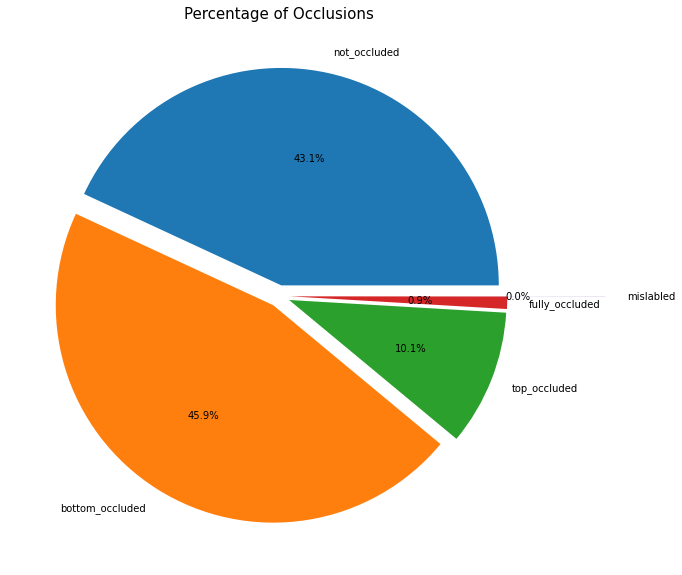

In [28]:
plt.figure(figsize=(10, 10))

plt.title("Percentage of Occlusions", fontsize=15)
plt.pie(
    occlusion_summary.values.squeeze(),
    labels=occlusion_summary.index,
    explode=explode,
    autopct='%1.1f%%',
)
plt.show()